## Prepare workspace and load data

<font size="3"> Set working directory

In [24]:
library(here)
here::here() # Should be set to the root of the repository
setwd(here::here())

[1] "/Users/ryanyork/Documents/Research/github/chlamy-comparison-v3-private"

<font size="3"> Source functions

In [25]:
source('code/R/chlamy_motility_utils.R')

<font size="3"> Load data from NAS

In [26]:
objs = load_chlamy_motility('/Volumes/Microscopy/Theia/chlamy_compare/morphology_motility/experiments/230509_motility_pools_exp1/3min/objects/')

## Compare autocorrelation of velocities

<font size="3"> Create data matrices for each species

In [27]:
#Combine all experiments into a single data frame
species = do.call(rbind, objs)

#Remove NAs
species = na.omit(species)

#Split on species
species = split(as.data.frame(species), species$species)

<font size="3"> Calculate autocorrelations

In [28]:
#Reinhardtii velocity
cr_v = acf(species$cr$velocity, lag = 100, plot = FALSE)

#Smithii velocity
cs_v = acf(species$cs$velocity, lag = 100, plot = FALSE)

#Reinhardtii velocity
cr_a = acf(species$cr$angular_velocity, lag = 100, plot = FALSE)

#Reinhardtii angular velocity
cs_a = acf(species$cs$angular_velocity, lag = 100, plot = FALSE)

<font size="3"> Plot autocorrelation distribvutions

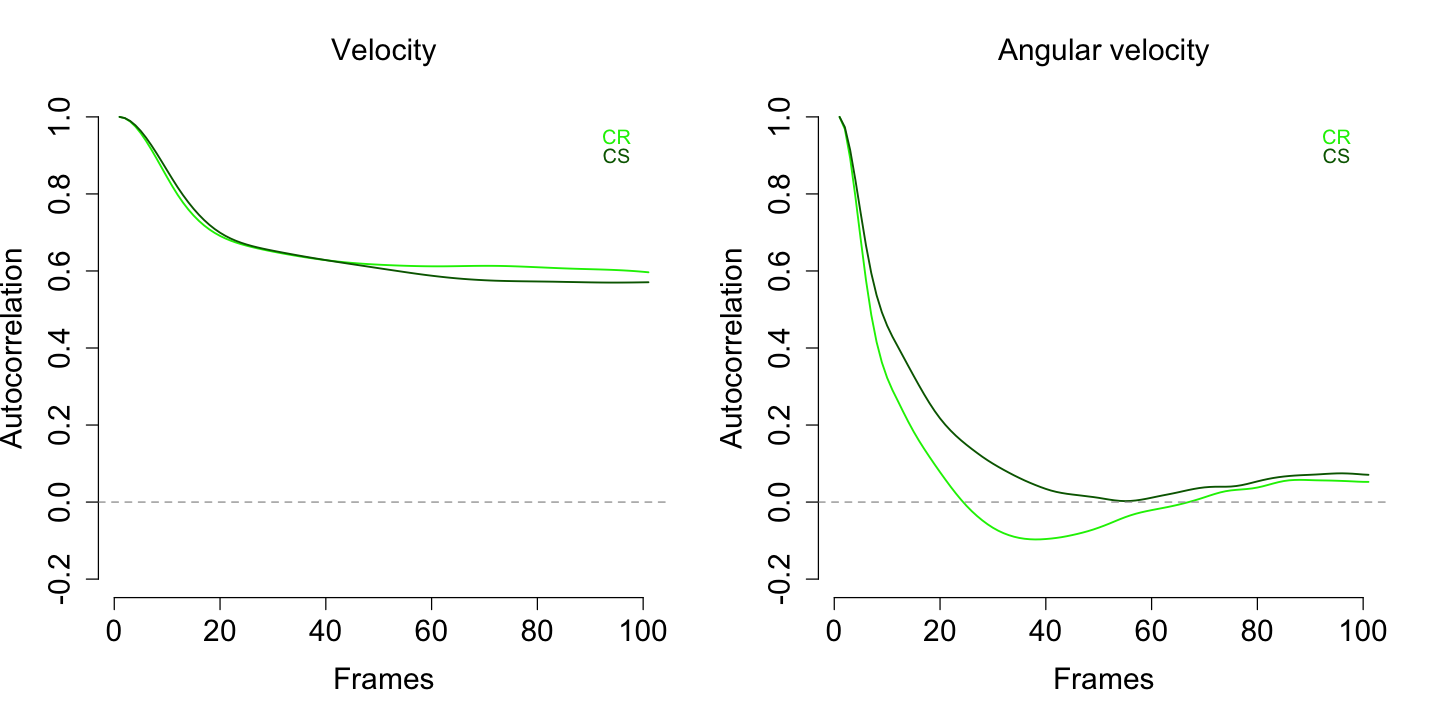

In [29]:
#Set up plot
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1,2))

#Plot velocity autocorrelation distributions
plot(cr_v$acf,
     type = 'l',
     lwd = 1.5,
     ylim = c(-0.2,1),
     ylab = 'Autocorrelation',
     xlab = 'Frames',
     col = 'green2',
     cex.axis = 1.5,
     cex.lab = 1.5,
     bty = 'n')
lines(cs_v$acf,
      lwd = 1.5,
      col = 'darkgreen')
title(main = 'Velocity', font.main = 1, cex.main = 1.5)
abline(h = 0, lty = 'dashed', col = 'gray60')
text(95, 0.95, 'CR', col = 'green2')
text(95, 0.9, 'CS', col = 'darkgreen')

#Plot angular velocity autocorrelation distributions
plot(cr_a$acf,
     type = 'l',
     lwd = 1.5,
     ylim = c(-0.2,1),
     ylab = 'Autocorrelation',
     xlab = 'Frames',
     col = 'green2',
     cex.axis = 1.5,
     cex.lab = 1.5,
     bty = 'n')
lines(cs_a$acf,
      lwd = 1.5,
      col = 'darkgreen')
title(main = 'Angular velocity', font.main = 1, cex.main = 1.5)
abline(h = 0, lty = 'dashed', col = 'gray60')
text(95, 0.95, 'CR', col = 'green2')
text(95, 0.9, 'CS', col = 'darkgreen')

## Compare joint velocity distributions

<font size="3"> Create lists of species-level measures

In [30]:
#Combine experiments
species = do.call(rbind, objs)

#Remove NAs
species = na.omit(species)

#Split on species
species = split(as.data.frame(species), species$species)

<font size="3"> Calculate joint velocity distributions (as probability density functions) and plot

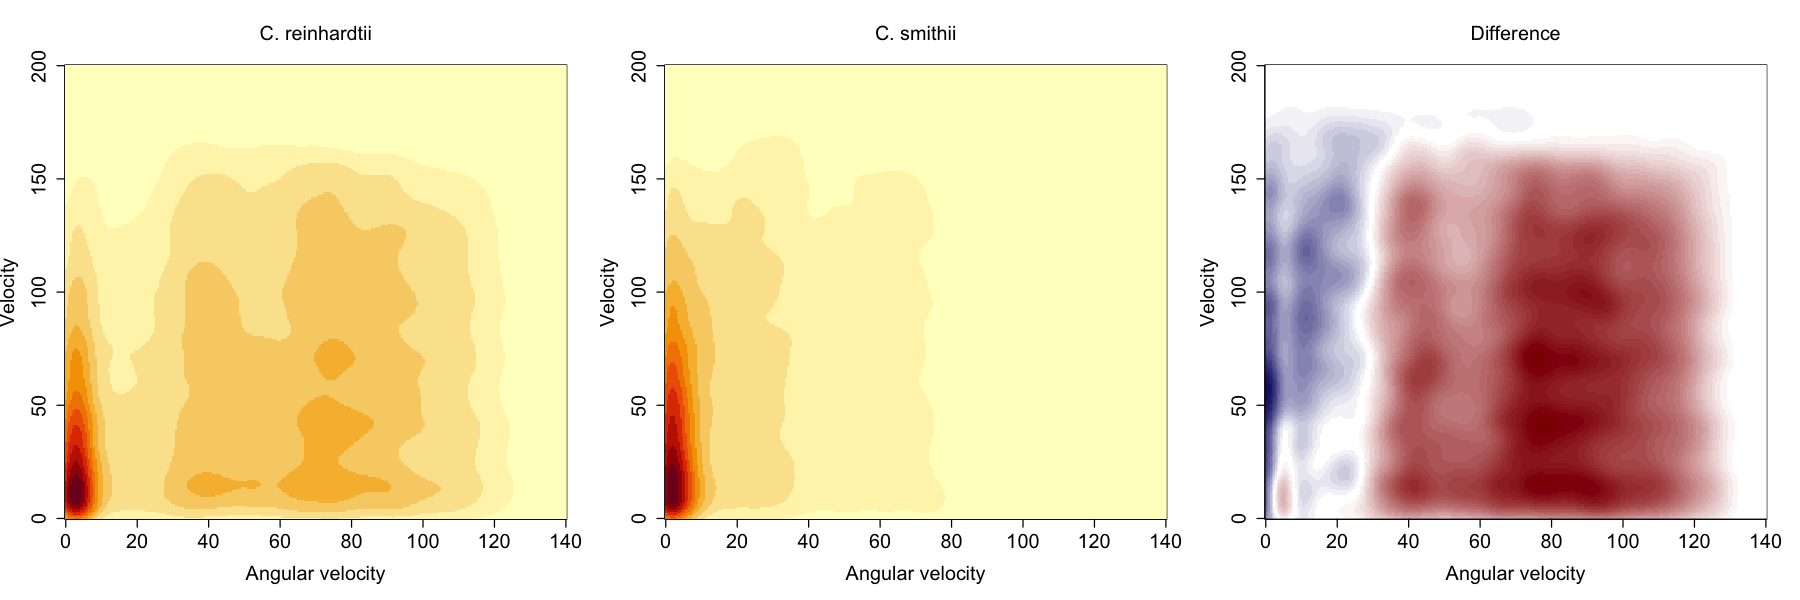

In [31]:
#Plot
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1,3))

#CR
cr = plot_velocity_prob_density_function(species$cr$velocity,
                                         species$cr$angular_velocity,
                                         title_label = 'C. reinhardtii')

#CS
cs = plot_velocity_prob_density_function(species$cs$velocity,
                                         species$cs$angular_velocity,
                                         title_label = 'C. smithii')

#Difference
d = plot_diff_prob_density_function(cr, cs)

## Compare joint velocity distributions as a function of cell number

<font size="3"> Get vector of unique experiment names. This will be used to ID experiments where there were multiple cells (i.e. the experiment name will appear >1x).

In [32]:
y = duplicated(unlist(lapply(names(objs), function(x) substr(x, 1, nchar(x)-2))))
for(i in 1:(length(y)-1)){
  if(y[i+1]==TRUE){
    y[i] = TRUE
  }
}

<font size="3"> Separate single and multi cell experiments

In [33]:
#Multi
multi = objs[y==TRUE]

#Single
single = objs[y==FALSE]

#Combine
multi = do.call(rbind, multi)
single = do.call(rbind, single)

#Remove NAs
multi = na.omit(multi)
single = na.omit(single)

<font size="3"> Calculate joint distributions by cell # and plot

In [ ]:
par(mfrow = c(2,3))
options(repr.plot.width = 15, repr.plot.height = 10)

toTest = c('cr', 'cs')
pdfs = list()
for(i in 1:2){
  
  #Single
  single_2d = plot_velocity_prob_density_function(single$velocity[single$species == toTest[i]],
                                                  single$angular_velocity[single$species == toTest[i]],
                                                  title_label = 'Individual cells')
  pdfs[[paste(toTest[i], 'single', sep = '_')]] = single_2d
  
  #Multiple
  multi_2d = plot_velocity_prob_density_function(multi$velocity[multi$species == toTest[i]],
                                                 multi$angular_velocity[multi$species == toTest[i]],
                                                 title_label = 'Multiple cells') 
  pdfs[[paste(toTest[i], 'multi', sep = '_')]] = multi_2d
  
  #Difference
  d = plot_diff_prob_density_function(single_2d,
                                      multi_2d)
  pdfs[[paste(toTest[i], 'diff', sep = '_')]] = d

}